<a href="https://colab.research.google.com/github/PauNanda/CD_databits/blob/main/02_Proyecto_Fase_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
# Librerías para visualización
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATABITS/PROGRAMA_CIENTIFICO_DATOS/LEC3_MachineLearning1/media prediction and its cost.csv', 
                 sep = ',', decimal = '.', index_col = 0)
df.head(10)

,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
food_category,,,,,,,,,,,,,,,,,,,,,
Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Double Down Sale,USA,M,F,2.0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
Breakfast Foods,Frozen Foods,Food,5.44,2.5568,4.0,Cash Register Lottery,USA,S,F,4.0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
Breakfast Foods,Frozen Foods,Food,3.74,1.6082,2.0,Cash Register Lottery,USA,S,M,1.0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Cash Register Lottery,USA,S,F,2.0,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60428 entries, Breakfast Foods to Specialty
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_department             60428 non-null  object 
 1   food_family                 60428 non-null  object 
 2   store_sales(in millions)    60428 non-null  float64
 3   store_cost(in millions)     60428 non-null  float64
 4   unit_sales(in millions)     60428 non-null  float64
 5   promotion_name              60428 non-null  object 
 6   sales_country               60428 non-null  object 
 7   marital_status              60428 non-null  object 
 8   gender                      60428 non-null  object 
 9   total_children              60428 non-null  float64
 10  education                   60428 non-null  object 
 11  member_card                 60428 non-null  object 
 12  occupation                  60428 non-null  object 
 13  houseowner        

In [6]:
# RESUMEN VARIABLES NUMÉRICAS
df.describe(include = np.number)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [7]:
# RESUMEN DE VARIABLES CATEGÓRICAS
df.describe(include = np.object_) 

,food_department,food_family,promotion_name,sales_country,marital_status,gender,education,member_card,occupation,houseowner,avg. yearly_income,brand_name,store_type,store_city,store_state,media_type
count,60428,60428,60428,60428,60428,60428,60428,60428,60428,60428,60428,60428,60428,60428,60428,60428
unique,22,3,49,3,2,2,5,4,5,2,8,111,5,19,10,13
top,Produce,Food,Weekend Markdown,USA,S,F,Partial High School,Bronze,Professional,Y,$30K - $50K,Hermanos,Supermarket,Tacoma,WA,"Daily Paper, Radio"
freq,8521,43284,2330,38892,30355,30942,18201,33807,19915,36510,19514,1839,26192,5704,19370,6820


In [8]:
categoria = df.promotion_name.unique()
cat_dic = {}
cont = 0

for cat in categoria:
  print(cat)
  cat_dic[cat] = cont
  cont = cont + 1
cat_dic

Bag Stuffers
Cash Register Lottery
High Roller Savings
Double Down Sale
Green Light Days
Big Time Savings
Price Savers
Price Slashers
Dollar Days
Two Day Sale
Super Duper Savers
Weekend Markdown
Dollar Cutters
Sales Galore
Big Promo
Free For All
Savings Galore
Unbeatable Price Savers
Price Smashers
Shelf Clearing Days
Sales Days
Go For It
Super Savers
Wallet Savers
Save-It Sale
Price Destroyers
Two for One
Big Time Discounts
Shelf Emptiers
Bye Bye Baby
One Day Sale
Fantastic Discounts
Saving Days
You Save Days
Sale Winners
Coupon Spectacular
Three for One
Price Winners
Dimes Off
I Cant Believe It Sale
Money Savers
Green Light Special
Price Cutters
Tip Top Savings
Best Savings
Pick Your Savings
Double Your Savings
Mystery Sale
Super Wallet Savers


{'Bag Stuffers': 0,
 'Cash Register Lottery': 1,
 'High Roller Savings': 2,
 'Double Down Sale': 3,
 'Green Light Days': 4,
 'Big Time Savings': 5,
 'Price Savers': 6,
 'Price Slashers': 7,
 'Dollar Days': 8,
 'Two Day Sale': 9,
 'Super Duper Savers': 10,
 'Weekend Markdown': 11,
 'Dollar Cutters': 12,
 'Sales Galore': 13,
 'Big Promo': 14,
 'Free For All': 15,
 'Savings Galore': 16,
 'Unbeatable Price Savers': 17,
 'Price Smashers': 18,
 'Shelf Clearing Days': 19,
 'Sales Days': 20,
 'Go For It': 21,
 'Super Savers': 22,
 'Wallet Savers': 23,
 'Save-It Sale': 24,
 'Price Destroyers': 25,
 'Two for One': 26,
 'Big Time Discounts': 27,
 'Shelf Emptiers': 28,
 'Bye Bye Baby': 29,
 'One Day Sale': 30,
 'Fantastic Discounts': 31,
 'Saving Days': 32,
 'You Save Days': 33,
 'Sale Winners': 34,
 'Coupon Spectacular': 35,
 'Three for One': 36,
 'Price Winners': 37,
 'Dimes Off': 38,
 'I Cant Believe It Sale': 39,
 'Money Savers': 40,
 'Green Light Special': 41,
 'Price Cutters': 42,
 'Tip Top 

In [9]:
df.isnull().sum() # NO DATOS NA

food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_sqft                   0
meat_sqf

In [ ]:
df.duplicated().value_counts() # NO DUPLICADOS

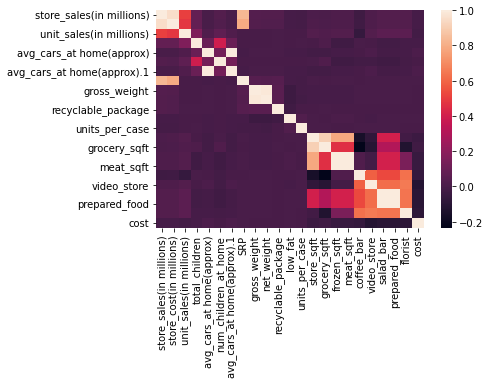

In [10]:
df_num = df.select_dtypes(include = ["number"])
sns.heatmap(df_num.corr())

In [11]:
corr_mat = df_num.corr()
corr_mat[corr_mat >= 0.6]

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
store_sales(in millions),1.000000,0.954685,NaN,NaN,NaN,NaN,NaN,0.833478,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_cost(in millions),0.954685,1.000000,NaN,NaN,NaN,NaN,NaN,0.795880,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_sales(in millions),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_children,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_cars_at home(approx),NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_children_at_home,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_cars_at home(approx).1,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRP,0.833478,0.795880,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.988903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
net_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.988903,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_selec = df.loc[:,['store_sales(in millions)','store_cost(in millions)','SRP','avg. yearly_income','marital_status']]
df_selec.head(6)

,store_sales(in millions),store_cost(in millions),SRP,avg. yearly_income,marital_status
food_category,,,,,
Breakfast Foods,7.36,2.7232,1.84,$10K - $30K,M
Breakfast Foods,5.52,2.5944,1.84,$50K - $70K,M
Breakfast Foods,3.68,1.3616,1.84,$10K - $30K,S
Breakfast Foods,3.68,1.1776,1.84,$30K - $50K,M
Breakfast Foods,4.08,1.4280,1.36,$30K - $50K,M
Breakfast Foods,4.08,1.4688,1.36,$50K - $70K,M


In [56]:
categoria = df.marital_status.unique()
cat_dic = {}
cont = 0

for cat in categoria:
  print(cat)
  cat_dic[cat] = cont
  cont = cont + 1
cat_dic
df_selec['marital_status'] = df_selec.marital_status.map(cat_dic)

M
S


In [57]:
categoria = df_selec['avg. yearly_income'].unique()
cat_dic = {}
cont = 0

for cat in categoria:
  print(cat)
  cat_dic[cat] = cont
  cont = cont + 1
cat_dic
df_selec['avg. yearly_income'] = df_selec['avg. yearly_income'].map(cat_dic)

$10K - $30K
$50K - $70K
$30K - $50K
$70K - $90K
$110K - $130K
$130K - $150K
$150K +
$90K - $110K


In [58]:
df_selec.head()

,store_sales(in millions),store_cost(in millions),SRP,avg. yearly_income,marital_status
food_category,,,,,
Breakfast Foods,7.36,2.7232,1.84,0,0
Breakfast Foods,5.52,2.5944,1.84,1,0
Breakfast Foods,3.68,1.3616,1.84,0,1
Breakfast Foods,3.68,1.1776,1.84,2,0
Breakfast Foods,4.08,1.4280,1.36,2,0


In [59]:
df_selec['marital_status'] = pd.to_numeric(df_selec['marital_status'])
df_selec['avg. yearly_income'] = pd.to_numeric(df_selec['avg. yearly_income'])

### MODELO DE REGRESIÓN LINEAL

In [60]:
y = df_selec['store_cost(in millions)']
X = df_selec.loc[:, ['store_sales(in millions)', 'SRP', 'avg. yearly_income','marital_status']]

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(48342, 4) (48342,)
(12086, 4) (12086,)


In [70]:
# Creación del algoritmo LASSO
lasso = Lasso(alpha=2)
lasso

Lasso(alpha=2)

In [71]:
#Ajustamos el algoritmo con los datos de training
lasso.fit(X_train, y_train)

Lasso(alpha=2)

In [72]:
#Analizamos los coeficientes de LASSO
print(pd.Series(lasso.coef_.tolist()))

0    0.234007
1    0.000000
2   -0.000000
3   -0.000000
dtype: float64


In [73]:
# Predecimos con nuestro algoritmo en los datos training (analizar overfitting)
yHat_train_lasso = lasso.predict(X_train)

In [74]:
# Predecimos con nuestro algoritmo en los datos test
yHat_test_lasso = lasso.predict(X_test)

In [75]:
print('Resultados Regresión LASSO:')
print('Error Cuadrático Medio (MSE):', metrics.mean_squared_error(y_train, yHat_train_lasso))
print('La raíz del Error Cuadrático Medio (RMSE):', metrics.mean_squared_error(y_train, yHat_train_lasso, squared=False))

Resultados Regresión LASSO:
Error Cuadrático Medio (MSE): 0.5209589983058656
La raíz del Error Cuadrático Medio (RMSE): 0.7217748944829444


In [76]:
print('Resultados Regresión Lasso:')
print('Error Cuadrático Medio (MSE):', metrics.mean_squared_error(y_test, yHat_test_lasso))
print('La raíz del Error Cuadrático Medio (RMSE):', metrics.mean_squared_error(y_test, yHat_test_lasso, squared=False))

Resultados Regresión Lasso:
Error Cuadrático Medio (MSE): 0.5145742414806171
La raíz del Error Cuadrático Medio (RMSE): 0.7173383033692102


### MODELO DE REGRESIÓN LOGÍSTICA

In [80]:
y1 = df_selec['avg. yearly_income']
X1 = df_selec.loc[:, ['store_cost(in millions)','store_sales(in millions)', 'SRP','marital_status']]

# División en train y test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state=0)

print(X_train1.shape , y_train1.shape)
print(X_test1.shape , y_test1.shape)

(48342, 4) (48342,)
(12086, 4) (12086,)


In [81]:
# Selección de las etiquetas de las variables numéricas
X_num = X1.select_dtypes(include=np.number).columns
print(X_num)

Index(['store_cost(in millions)', 'store_sales(in millions)', 'SRP',
       'marital_status'],
      dtype='object')


In [93]:
# Creación de un Pipeline para el preprocesamiento de las variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  MinMaxScaler(feature_range=(0, 1)))])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler())])

In [95]:
# Delimitar el preprocesamiento de variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_num)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['store_cost(in millions)', 'store_sales(in millions)', 'SRP',
       'marital_status'],
      dtype='object'))])

In [96]:
reg_log  = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0, n_jobs = -1) 
reg_log 

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=0)

In [97]:
# Creción de Pipeline para preprocesamiento y ejecución del algoritmo
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', reg_log)])

clf.fit(X_train1, y_train1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['store_cost(in millions)', 'store_sales(in millions)', 'SRP',
       'marital_status'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1, random_state=0))])

In [100]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train1,y_train1)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.32137685534085303


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [101]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.32137685534085303


In [102]:
logreg2=LogisticRegression(C=0.001,penalty="l2")
logreg2.fit(X_train1,y_train1)
print("score",logreg2.score(X_test1,y_test1))

score 0.32914115505543606


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [103]:
# Predecir con training para analizar overfitting
yHat_train = logreg2.predict(X_train1)
yHat_train

array([2, 2, 2, ..., 2, 2, 2])

In [104]:
# Evaluar desempeño algortimo al prededir con test
yHat_test = logreg2.predict(X_test1)
yHat_test

array([2, 2, 2, ..., 2, 2, 2])

In [105]:
#Métrica de evaluación desempeño algoritmo
print('Exactitud (Accuracy):', metrics.accuracy_score(y_test1, yHat_test))

Exactitud (Accuracy): 0.32914115505543606


Text(0.5, 24.0, 'yHat')

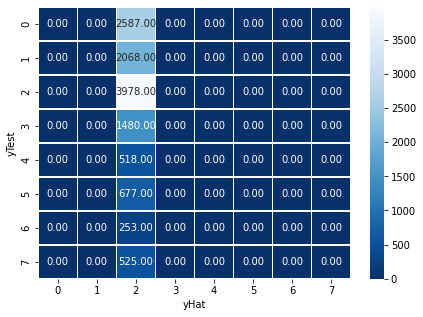

In [106]:
# Matriz de Confusion
matriz_confusion = metrics.confusion_matrix(y_test1, yHat_test)

# Graficar la matriz de Confusion
plt.figure(figsize=(7, 5))
plot_matriz = sns.heatmap(matriz_confusion, annot = True, fmt = '.2f', linewidths = 0.5, cmap = 'Blues_r')
plt.ylabel('yTest')
plt.xlabel('yHat')